# Analyse object pointcloud

In [9]:
import object_reconstruction.data.obj_pointcloud as obj_pointcloud
import object_reconstruction.data.objects as objects
import os
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from glob import glob

In [17]:
pointcloud_path = os.path.join(os.path.dirname(obj_pointcloud.__file__), '101352/obj_pointcloud.npy')
data = np.load(pointcloud_path, allow_pickle=True)
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# 3D plot (Plotly), except the points ([0, 0, 0])
fig = go.Figure(
    [go.Scatter3d(x=x, y=y,z=z, mode='markers',
        marker=dict(
            size=2
            ))
        ]
)
fig.show()

102763
103030
100749
3614
101352


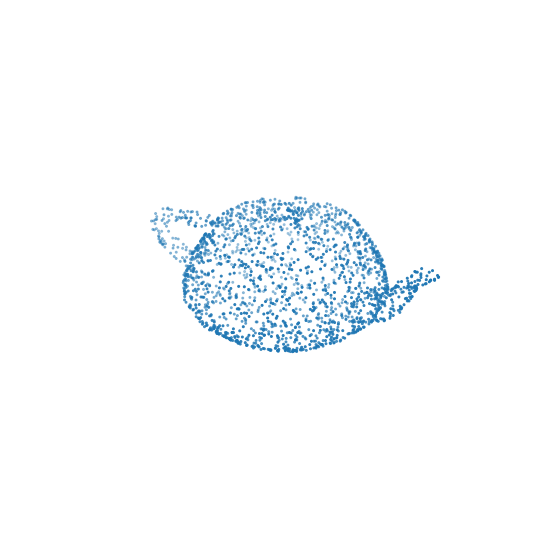

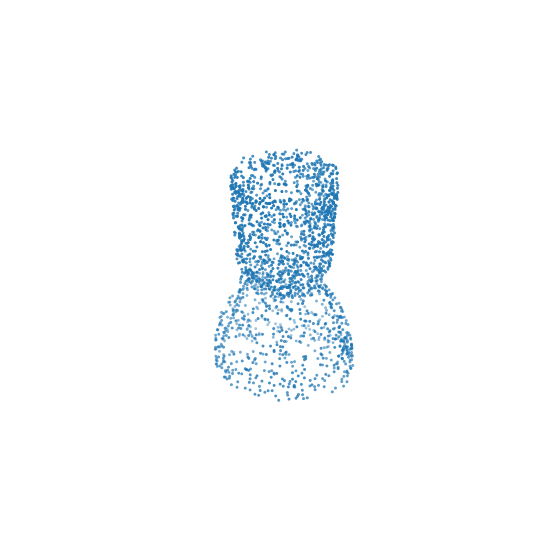

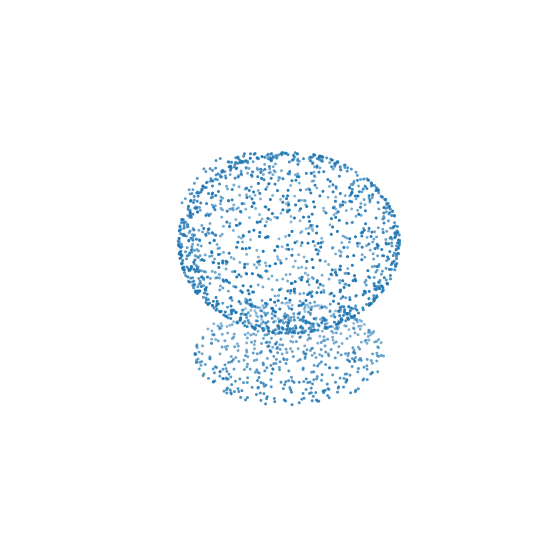

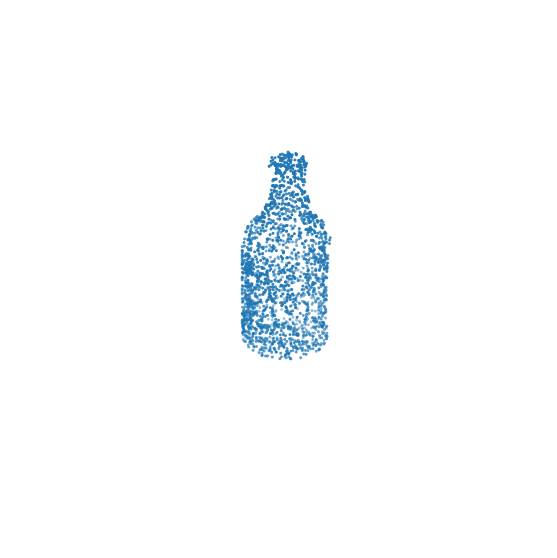

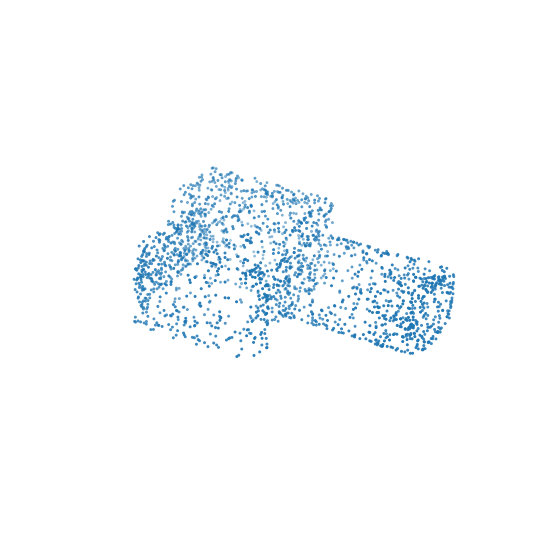

In [26]:
# List all objects
list_objects = [filepath.split('/')[-1] for filepath in glob(os.path.join(os.path.dirname(objects.__file__), '*'))]
list_objects.remove('__init__.py')
list_objects.remove('__pycache__')

for obj_index in list_objects:
    obj_path = os.path.join(os.path.dirname(obj_pointcloud.__file__), obj_index, 'obj_pointcloud.npy')
    obj = np.load(obj_path, allow_pickle=True)
    
    # Plot obj pointcloud
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    print(obj_index)
    # Create plots
    scatters = ax.scatter(obj[:, 2], obj[:, 0], obj[:, 1], s=4)
    plt.grid(False)
    plt.axis('off')
    path = os.path.join("/Users/ri21540/Documents/PhD_Courses/Term2/Summer Project/images", f"{obj_index}.png")
    plt.savefig(path)